C:\Users\alexa\AppData\Local\Temp\ipykernel_30276\352834159.py:29: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_matrix = cm_percent_named.applymap(lambda x: f"{x:.1f}%" if x >= 2 else "")


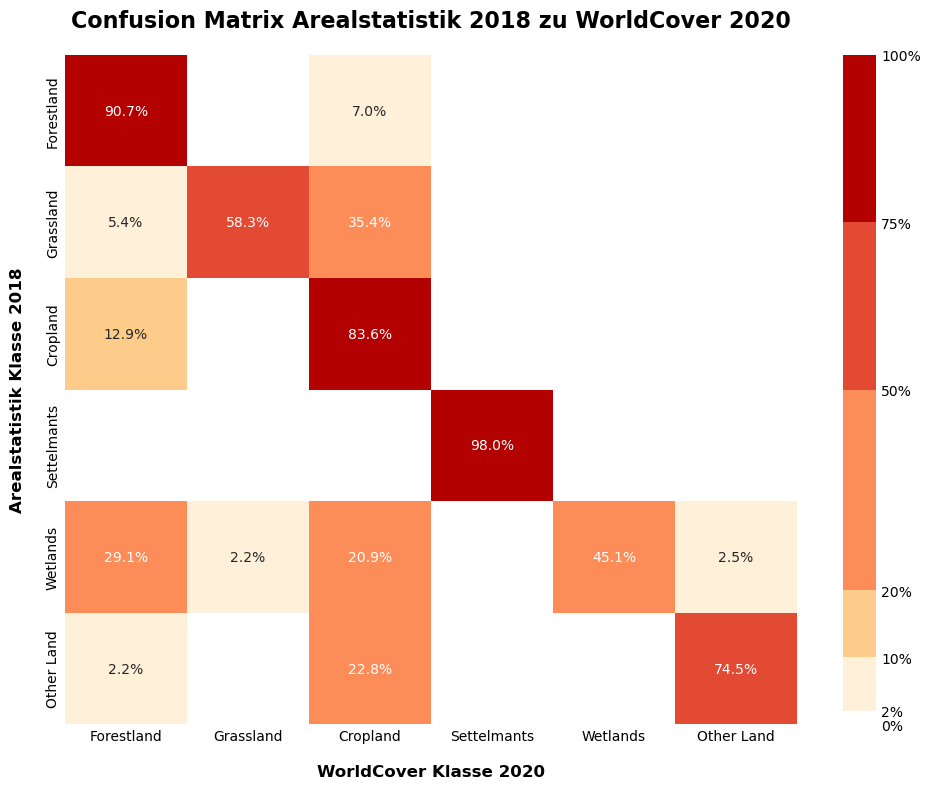

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap, BoundaryNorm

# Mapping für Label-Namen (optional)
label_names = {
    1: "Forestland",
    2: "Grassland",
    3: "Cropland",
    4: "Settelments",
    5: "Wetlands",
    6: "Other Land"
}

# CSV mit absoluten Werten laden
cm_df = pd.read_csv("confusion_matrix.csv", index_col=0)

# Prozentwerte pro Zeile berechnen
cm_percent = cm_df.div(cm_df.sum(axis=1), axis=0) * 100
cm_percent = cm_percent.fillna(0.0)

# Spalten und Index in int umwandeln, dann mit Namen ersetzen
cm_percent.columns = cm_percent.columns.astype(int)
cm_percent.index = cm_percent.index.astype(int)
cm_percent_named = cm_percent.rename(index=label_names, columns=label_names)

# Annotation mit Prozent, falls gewünscht
annot_matrix = cm_percent_named.applymap(lambda x: f"{x:.1f}%" if x >= 2 else "")

# Deine Farbpalette (pro Intervall)
colors = [
    (1, 1, 1, 0),            # Transparent für 0-2%
    "#fef0d9",               # Hellgelb
    "#fdcc8a",               # Gelb-Orange
    "#fc8d59",               # Orange
    "#e34a33",               # Rot-Orange
    "#b30000"                # Dunkelrot
]
cmap = ListedColormap(colors)

# Intervalle
bounds = [0, 2, 10, 20, 50, 75, 100]
norm = BoundaryNorm(bounds, cmap.N)

plt.figure(figsize=(10, 8))
ax = sns.heatmap(
    cm_percent_named,
    annot=annot_matrix,
    fmt="",
    cmap=cmap,
    norm=norm,
    xticklabels=cm_percent_named.columns,
    yticklabels=cm_percent_named.index,
    cbar=False  # <-- Disable default colorbar from seaborn!
)

# Entfernen von Achsstrichen
for spine in ax.spines.values():
    spine.set_visible(False)
ax.tick_params(axis='both', which='both', length=0)

plt.title("Confusion Matrix Arealstatistik 2018 zu WorldCover 2020",
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel("WorldCover Klasse 2020",
           fontsize=12, fontweight='bold', labelpad=15)
plt.ylabel("Arealstatistik Klasse 2018",
           fontsize=12, fontweight='bold', labelpad=15)
plt.tight_layout()

# Jetzt: Colorbar proportional zum Intervall (bounds)
import matplotlib as mpl
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Dummy array for colorbar

# Custom colorbar next to your existing axes
cbar = plt.colorbar(
    sm,
    ax=ax,
    boundaries=bounds,
    spacing="proportional",
    ticks=bounds,
    extend='neither'
)
cbar.set_ticklabels([f"{b}%" for b in bounds])
cbar.set_label("", rotation=270, labelpad=20)

# Remove border and tick lines from colorbar
cbar.outline.set_visible(False)
cbar.ax.tick_params(length=0)

cbar.set_ticklabels([f"{b}%" for b in bounds])
cbar.set_label("", rotation=270, labelpad=20)

plt.show()


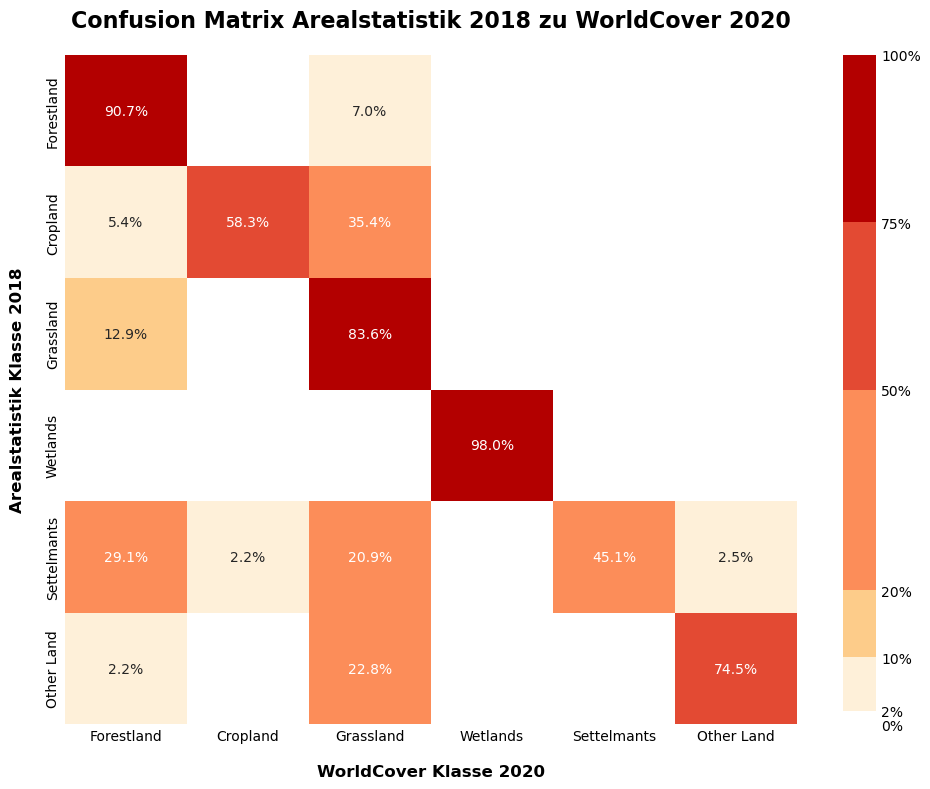

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib as mpl

# Mapping für Label-Namen (optional)
label_names = {
    1: "Forestland",
    2: "Cropland",
    3: "Grassland",
    4: "Wetlands",
    5: "Settelments",
    6: "Other Land"
}

# GeoDataFrame direkt laden
df = gpd.read_file("../../../../data/analysis/worldcover/arealstatistik_mapped_points_2020.gpkg")

# Nur Zeilen ohne NaN in den relevanten Spalten behalten
mask = df["IPCC_AS_Id"].notna() & df["IPCC_WC_Id"].notna()
y_true = df.loc[mask, "IPCC_AS_Id"]
y_pred = df.loc[mask, "IPCC_WC_Id"]

# Alle Klassen bestimmen (ohne NaN)
labels = sorted(set(y_true).union(set(y_pred)))

# Confusion Matrix erstellen
cm = confusion_matrix(y_true, y_pred, labels=labels)

# In DataFrame umwandeln mit Klassen als Index und Spaltennamen
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

# Prozentwerte pro Zeile berechnen
cm_percent = cm_df.div(cm_df.sum(axis=1), axis=0) * 100
cm_percent = cm_percent.fillna(0.0)

# Spalten und Index konvertieren und nach Namen mappen
cm_percent.columns = cm_percent.columns.astype(int)
cm_percent.index = cm_percent.index.astype(int)
cm_percent_named = cm_percent.rename(index=label_names, columns=label_names)

# Optionale Annotation
annot_matrix = cm_percent_named.map(lambda x: f"{x:.1f}%" if x >= 2 else "")

# Farbpalette (pro Intervall)
colors = [
    (1, 1, 1, 0),            # Transparent für 0-2%
    "#fef0d9",               # Hellgelb
    "#fdcc8a",               # Gelb-Orange
    "#fc8d59",               # Orange
    "#e34a33",               # Rot-Orange
    "#b30000"                # Dunkelrot
]
cmap = ListedColormap(colors)

bounds = [0, 2, 10, 20, 50, 75, 100]
norm = BoundaryNorm(bounds, cmap.N)

plt.figure(figsize=(10, 8))
ax = sns.heatmap(
    cm_percent_named,
    annot=annot_matrix,
    fmt="",
    cmap=cmap,
    norm=norm,
    xticklabels=cm_percent_named.columns,
    yticklabels=cm_percent_named.index,
    cbar=False  # Keine Standardfarblegende
)

# Entfernen von Achsstrichen
for spine in ax.spines.values():
    spine.set_visible(False)
ax.tick_params(axis='both', which='both', length=0)

plt.title("Confusion Matrix Arealstatistik 2018 zu WorldCover 2020",
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel("WorldCover Klasse 2020",
           fontsize=12, fontweight='bold', labelpad=15)
plt.ylabel("Arealstatistik Klasse 2018",
           fontsize=12, fontweight='bold', labelpad=15)
plt.tight_layout()

# Custom colorbar
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

cbar = plt.colorbar(
    sm,
    ax=ax,
    boundaries=bounds,
    spacing="proportional",
    ticks=bounds,
    extend='neither'
)
cbar.set_ticklabels([f"{b}%" for b in bounds])
cbar.set_label("", rotation=270, labelpad=20)
cbar.outline.set_visible(False)
cbar.ax.tick_params(length=0)

plt.show()


Zeitvergleiche

2018 zu 2019

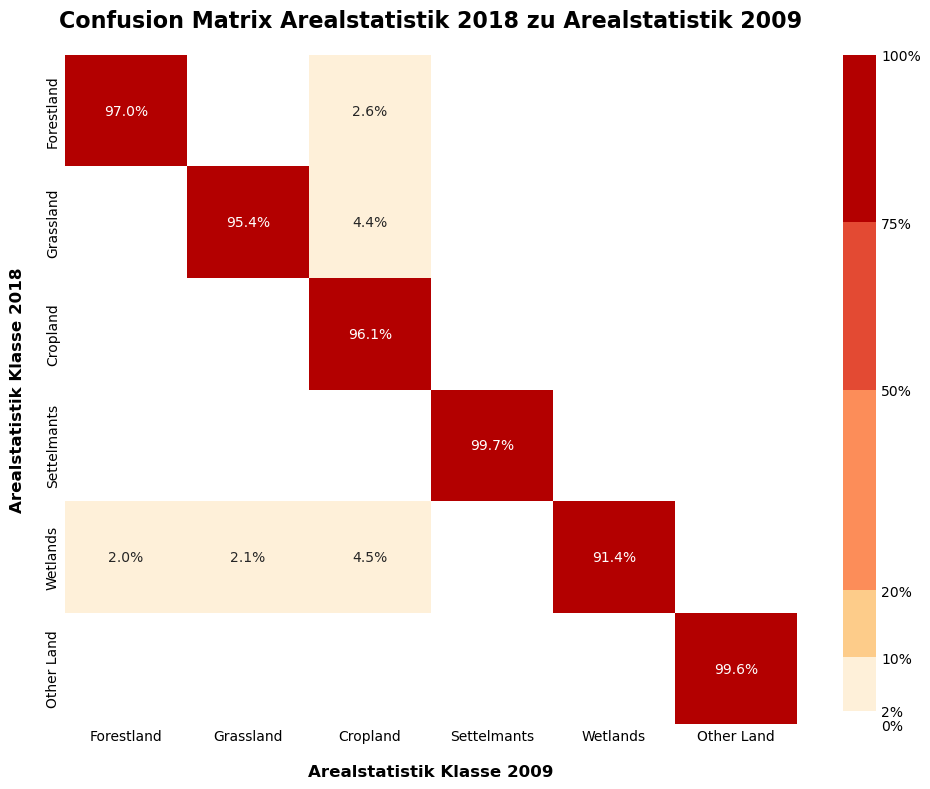

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib as mpl

data1 = "IPCC_AS_Id_18"
data2 = "IPCC_AS_Id_09"

# Mapping für Label-Namen IPCC Klassen
label_names = {
    1: "Forestland",
    2: "Grassland",
    3: "Cropland",
    4: "Settelments",
    5: "Wetlands",
    6: "Other Land"
}

# GeoDataFrame direkt laden
df = gpd.read_file("../../../../data/analysis/worldcover/arealstatistik_Zeitvergleich_mapped.gpkg")

# Nur Zeilen ohne NaN in den relevanten Spalten behalten
mask = df[data1].notna() & df[data2].notna()
y_true = df.loc[mask, data1]
y_pred = df.loc[mask, data2]

# Alle Klassen bestimmen (ohne NaN)
labels = sorted(set(y_true).union(set(y_pred)))

# Confusion Matrix erstellen
cm = confusion_matrix(y_true, y_pred, labels=labels)

# In DataFrame umwandeln mit Klassen als Index und Spaltennamen
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

# Prozentwerte pro Zeile berechnen
cm_percent = cm_df.div(cm_df.sum(axis=1), axis=0) * 100
cm_percent = cm_percent.fillna(0.0)

# Spalten und Index konvertieren und nach Namen mappen
cm_percent.columns = cm_percent.columns.astype(int)
cm_percent.index = cm_percent.index.astype(int)
cm_percent_named = cm_percent.rename(index=label_names, columns=label_names)

# Optionale Annotation
annot_matrix = cm_percent_named.map(lambda x: f"{x:.1f}%" if x >= 2 else "")

# Farbpalette (pro Intervall)
colors = [
    (1, 1, 1, 0),            # Transparent für 0-2%
    "#fef0d9",               # Hellgelb
    "#fdcc8a",               # Gelb-Orange
    "#fc8d59",               # Orange
    "#e34a33",               # Rot-Orange
    "#b30000"                # Dunkelrot
]
cmap = ListedColormap(colors)

bounds = [0, 2, 10, 20, 50, 75, 100]
norm = BoundaryNorm(bounds, cmap.N)

plt.figure(figsize=(10, 8))
ax = sns.heatmap(
    cm_percent_named,
    annot=annot_matrix,
    fmt="",
    cmap=cmap,
    norm=norm,
    xticklabels=cm_percent_named.columns,
    yticklabels=cm_percent_named.index,
    cbar=False  # Keine Standardfarblegende
)

# Entfernen von Achsstrichen
for spine in ax.spines.values():
    spine.set_visible(False)
ax.tick_params(axis='both', which='both', length=0)

plt.title("Confusion Matrix Arealstatistik 2018 zu Arealstatistik 2009",
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Arealstatistik Klasse 2009",
           fontsize=12, fontweight='bold', labelpad=15)
plt.ylabel("Arealstatistik Klasse 2018",
           fontsize=12, fontweight='bold', labelpad=15)
plt.tight_layout()

# Custom colorbar
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

cbar = plt.colorbar(
    sm,
    ax=ax,
    boundaries=bounds,
    spacing="proportional",
    ticks=bounds,
    extend='neither'
)
cbar.set_ticklabels([f"{b}%" for b in bounds])
cbar.set_label("", rotation=270, labelpad=20)
cbar.outline.set_visible(False)
cbar.ax.tick_params(length=0)

plt.show()


2018 zu 1997

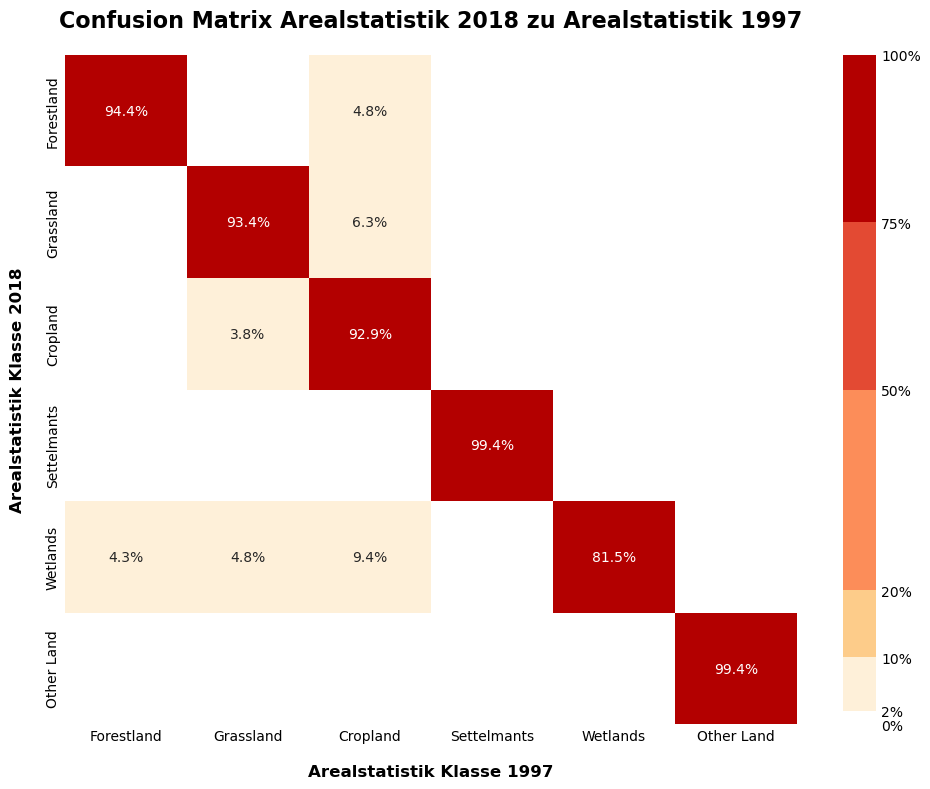

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib as mpl

data1 = "IPCC_AS_Id_18"
data2 = "IPCC_AS_Id_97"

# Mapping für Label-Namen IPCC Klassen
label_names = {
    1: "Forestland",
    2: "Grassland",
    3: "Cropland",
    4: "Settelments",
    5: "Wetlands",
    6: "Other Land"
}

# GeoDataFrame direkt laden
df = gpd.read_file("../../../../data/analysis/worldcover/arealstatistik_Zeitvergleich_mapped.gpkg")

# Nur Zeilen ohne NaN in den relevanten Spalten behalten
mask = df[data1].notna() & df[data2].notna()
y_true = df.loc[mask, data1]
y_pred = df.loc[mask, data2]

# Alle Klassen bestimmen (ohne NaN)
labels = sorted(set(y_true).union(set(y_pred)))

# Confusion Matrix erstellen
cm = confusion_matrix(y_true, y_pred, labels=labels)

# In DataFrame umwandeln mit Klassen als Index und Spaltennamen
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

# Prozentwerte pro Zeile berechnen
cm_percent = cm_df.div(cm_df.sum(axis=1), axis=0) * 100
cm_percent = cm_percent.fillna(0.0)

# Spalten und Index konvertieren und nach Namen mappen
cm_percent.columns = cm_percent.columns.astype(int)
cm_percent.index = cm_percent.index.astype(int)
cm_percent_named = cm_percent.rename(index=label_names, columns=label_names)

# Optionale Annotation
annot_matrix = cm_percent_named.map(lambda x: f"{x:.1f}%" if x >= 2 else "")

# Farbpalette (pro Intervall)
colors = [
    (1, 1, 1, 0),            # Transparent für 0-2%
    "#fef0d9",               # Hellgelb
    "#fdcc8a",               # Gelb-Orange
    "#fc8d59",               # Orange
    "#e34a33",               # Rot-Orange
    "#b30000"                # Dunkelrot
]
cmap = ListedColormap(colors)

bounds = [0, 2, 10, 20, 50, 75, 100]
norm = BoundaryNorm(bounds, cmap.N)

plt.figure(figsize=(10, 8))
ax = sns.heatmap(
    cm_percent_named,
    annot=annot_matrix,
    fmt="",
    cmap=cmap,
    norm=norm,
    xticklabels=cm_percent_named.columns,
    yticklabels=cm_percent_named.index,
    cbar=False  # Keine Standardfarblegende
)

# Entfernen von Achsstrichen
for spine in ax.spines.values():
    spine.set_visible(False)
ax.tick_params(axis='both', which='both', length=0)

plt.title("Confusion Matrix Arealstatistik 2018 zu Arealstatistik 1997",
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Arealstatistik Klasse 1997",
           fontsize=12, fontweight='bold', labelpad=15)
plt.ylabel("Arealstatistik Klasse 2018",
           fontsize=12, fontweight='bold', labelpad=15)
plt.tight_layout()

# Custom colorbar
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

cbar = plt.colorbar(
    sm,
    ax=ax,
    boundaries=bounds,
    spacing="proportional",
    ticks=bounds,
    extend='neither'
)
cbar.set_ticklabels([f"{b}%" for b in bounds])
cbar.set_label("", rotation=270, labelpad=20)
cbar.outline.set_visible(False)
cbar.ax.tick_params(length=0)

plt.show()


2018 zu 1985

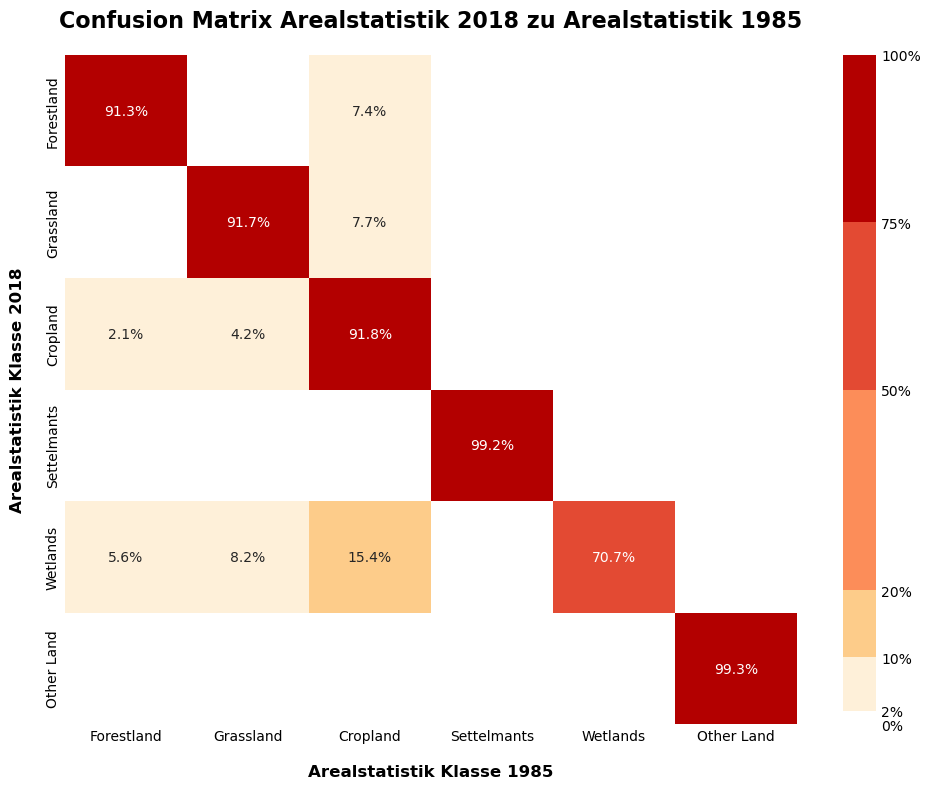

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib as mpl

data1 = "IPCC_AS_Id_18"
data2 = "IPCC_AS_Id_85"

# Mapping für Label-Namen IPCC Klassen
label_names = {
    1: "Forestland",
    2: "Grassland",
    3: "Cropland",
    4: "Settelments",
    5: "Wetlands",
    6: "Other Land"
}

# GeoDataFrame direkt laden
df = gpd.read_file("../../../../data/analysis/worldcover/arealstatistik_Zeitvergleich_mapped.gpkg")

# Nur Zeilen ohne NaN in den relevanten Spalten behalten
mask = df[data1].notna() & df[data2].notna()
y_true = df.loc[mask, data1]
y_pred = df.loc[mask, data2]

# Alle Klassen bestimmen (ohne NaN)
labels = sorted(set(y_true).union(set(y_pred)))

# Confusion Matrix erstellen
cm = confusion_matrix(y_true, y_pred, labels=labels)

# In DataFrame umwandeln mit Klassen als Index und Spaltennamen
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

# Prozentwerte pro Zeile berechnen
cm_percent = cm_df.div(cm_df.sum(axis=1), axis=0) * 100
cm_percent = cm_percent.fillna(0.0)

# Spalten und Index konvertieren und nach Namen mappen
cm_percent.columns = cm_percent.columns.astype(int)
cm_percent.index = cm_percent.index.astype(int)
cm_percent_named = cm_percent.rename(index=label_names, columns=label_names)

# Optionale Annotation
annot_matrix = cm_percent_named.map(lambda x: f"{x:.1f}%" if x >= 2 else "")

# Farbpalette (pro Intervall)
colors = [
    (1, 1, 1, 0),            # Transparent für 0-2%
    "#fef0d9",               # Hellgelb
    "#fdcc8a",               # Gelb-Orange
    "#fc8d59",               # Orange
    "#e34a33",               # Rot-Orange
    "#b30000"                # Dunkelrot
]
cmap = ListedColormap(colors)

bounds = [0, 2, 10, 20, 50, 75, 100]
norm = BoundaryNorm(bounds, cmap.N)

plt.figure(figsize=(10, 8))
ax = sns.heatmap(
    cm_percent_named,
    annot=annot_matrix,
    fmt="",
    cmap=cmap,
    norm=norm,
    xticklabels=cm_percent_named.columns,
    yticklabels=cm_percent_named.index,
    cbar=False  # Keine Standardfarblegende
)

# Entfernen von Achsstrichen
for spine in ax.spines.values():
    spine.set_visible(False)
ax.tick_params(axis='both', which='both', length=0)

plt.title("Confusion Matrix Arealstatistik 2018 zu Arealstatistik 1985",
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Arealstatistik Klasse 1985",
           fontsize=12, fontweight='bold', labelpad=15)
plt.ylabel("Arealstatistik Klasse 2018",
           fontsize=12, fontweight='bold', labelpad=15)
plt.tight_layout()

# Custom colorbar
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

cbar = plt.colorbar(
    sm,
    ax=ax,
    boundaries=bounds,
    spacing="proportional",
    ticks=bounds,
    extend='neither'
)
cbar.set_ticklabels([f"{b}%" for b in bounds])
cbar.set_label("", rotation=270, labelpad=20)
cbar.outline.set_visible(False)
cbar.ax.tick_params(length=0)

plt.show()


2009 zu 1997

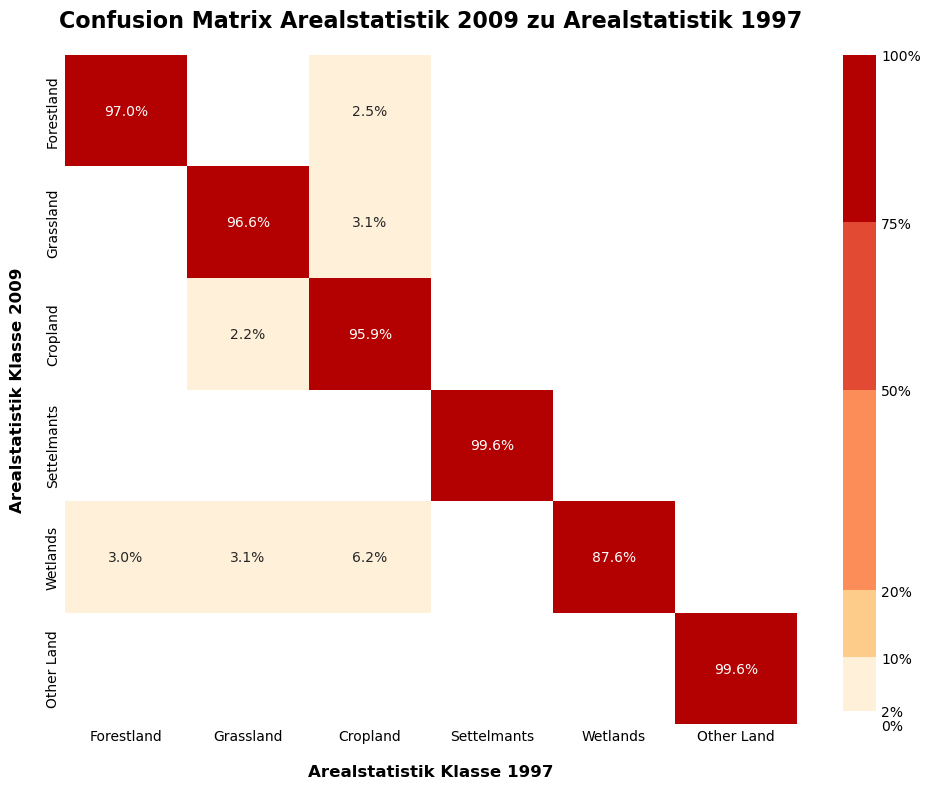

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib as mpl

data1 = "IPCC_AS_Id_09"
data2 = "IPCC_AS_Id_97"

# Mapping für Label-Namen IPCC Klassen
label_names = {
    1: "Forestland",
    2: "Grassland",
    3: "Cropland",
    4: "Settelments",
    5: "Wetlands",
    6: "Other Land"
}

# GeoDataFrame direkt laden
df = gpd.read_file("../../../../data/analysis/worldcover/arealstatistik_Zeitvergleich_mapped.gpkg")

# Nur Zeilen ohne NaN in den relevanten Spalten behalten
mask = df[data1].notna() & df[data2].notna()
y_true = df.loc[mask, data1]
y_pred = df.loc[mask, data2]

# Alle Klassen bestimmen (ohne NaN)
labels = sorted(set(y_true).union(set(y_pred)))

# Confusion Matrix erstellen
cm = confusion_matrix(y_true, y_pred, labels=labels)

# In DataFrame umwandeln mit Klassen als Index und Spaltennamen
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

# Prozentwerte pro Zeile berechnen
cm_percent = cm_df.div(cm_df.sum(axis=1), axis=0) * 100
cm_percent = cm_percent.fillna(0.0)

# Spalten und Index konvertieren und nach Namen mappen
cm_percent.columns = cm_percent.columns.astype(int)
cm_percent.index = cm_percent.index.astype(int)
cm_percent_named = cm_percent.rename(index=label_names, columns=label_names)

# Optionale Annotation
annot_matrix = cm_percent_named.map(lambda x: f"{x:.1f}%" if x >= 2 else "")

# Farbpalette (pro Intervall)
colors = [
    (1, 1, 1, 0),            # Transparent für 0-2%
    "#fef0d9",               # Hellgelb
    "#fdcc8a",               # Gelb-Orange
    "#fc8d59",               # Orange
    "#e34a33",               # Rot-Orange
    "#b30000"                # Dunkelrot
]
cmap = ListedColormap(colors)

bounds = [0, 2, 10, 20, 50, 75, 100]
norm = BoundaryNorm(bounds, cmap.N)

plt.figure(figsize=(10, 8))
ax = sns.heatmap(
    cm_percent_named,
    annot=annot_matrix,
    fmt="",
    cmap=cmap,
    norm=norm,
    xticklabels=cm_percent_named.columns,
    yticklabels=cm_percent_named.index,
    cbar=False  # Keine Standardfarblegende
)

# Entfernen von Achsstrichen
for spine in ax.spines.values():
    spine.set_visible(False)
ax.tick_params(axis='both', which='both', length=0)

plt.title("Confusion Matrix Arealstatistik 2009 zu Arealstatistik 1997",
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Arealstatistik Klasse 1997",
           fontsize=12, fontweight='bold', labelpad=15)
plt.ylabel("Arealstatistik Klasse 2009",
           fontsize=12, fontweight='bold', labelpad=15)
plt.tight_layout()

# Custom colorbar
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

cbar = plt.colorbar(
    sm,
    ax=ax,
    boundaries=bounds,
    spacing="proportional",
    ticks=bounds,
    extend='neither'
)
cbar.set_ticklabels([f"{b}%" for b in bounds])
cbar.set_label("", rotation=270, labelpad=20)
cbar.outline.set_visible(False)
cbar.ax.tick_params(length=0)

plt.show()


1997 zu 1985

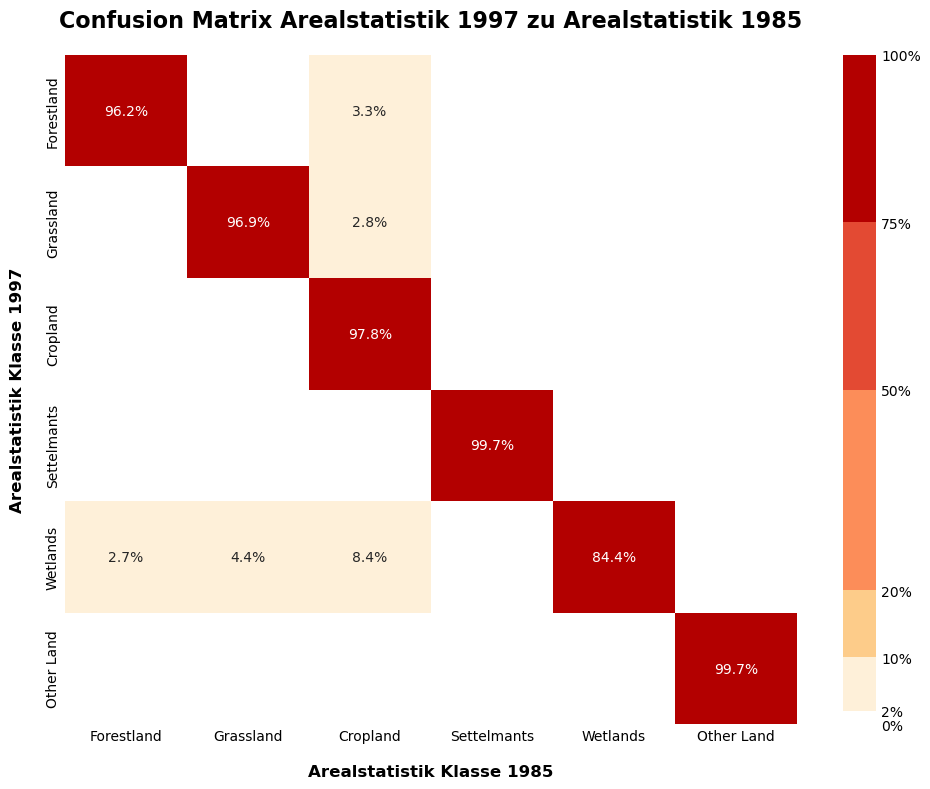

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib as mpl

data1 = "IPCC_AS_Id_97"
data2 = "IPCC_AS_Id_85"

# Mapping für Label-Namen IPCC Klassen
label_names = {
    1: "Forestland",
    2: "Grassland",
    3: "Cropland",
    4: "Settelments",
    5: "Wetlands",
    6: "Other Land"
}

# GeoDataFrame direkt laden
df = gpd.read_file("../../../../data/analysis/worldcover/arealstatistik_Zeitvergleich_mapped.gpkg")

# Nur Zeilen ohne NaN in den relevanten Spalten behalten
mask = df[data1].notna() & df[data2].notna()
y_true = df.loc[mask, data1]
y_pred = df.loc[mask, data2]

# Alle Klassen bestimmen (ohne NaN)
labels = sorted(set(y_true).union(set(y_pred)))

# Confusion Matrix erstellen
cm = confusion_matrix(y_true, y_pred, labels=labels)

# In DataFrame umwandeln mit Klassen als Index und Spaltennamen
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

# Prozentwerte pro Zeile berechnen
cm_percent = cm_df.div(cm_df.sum(axis=1), axis=0) * 100
cm_percent = cm_percent.fillna(0.0)

# Spalten und Index konvertieren und nach Namen mappen
cm_percent.columns = cm_percent.columns.astype(int)
cm_percent.index = cm_percent.index.astype(int)
cm_percent_named = cm_percent.rename(index=label_names, columns=label_names)

# Optionale Annotation
annot_matrix = cm_percent_named.map(lambda x: f"{x:.1f}%" if x >= 2 else "")

# Farbpalette (pro Intervall)
colors = [
    (1, 1, 1, 0),            # Transparent für 0-2%
    "#fef0d9",               # Hellgelb
    "#fdcc8a",               # Gelb-Orange
    "#fc8d59",               # Orange
    "#e34a33",               # Rot-Orange
    "#b30000"                # Dunkelrot
]
cmap = ListedColormap(colors)

bounds = [0, 2, 10, 20, 50, 75, 100]
norm = BoundaryNorm(bounds, cmap.N)

plt.figure(figsize=(10, 8))
ax = sns.heatmap(
    cm_percent_named,
    annot=annot_matrix,
    fmt="",
    cmap=cmap,
    norm=norm,
    xticklabels=cm_percent_named.columns,
    yticklabels=cm_percent_named.index,
    cbar=False  # Keine Standardfarblegende
)

# Entfernen von Achsstrichen
for spine in ax.spines.values():
    spine.set_visible(False)
ax.tick_params(axis='both', which='both', length=0)

plt.title("Confusion Matrix Arealstatistik 1997 zu Arealstatistik 1985",
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Arealstatistik Klasse 1985",
           fontsize=12, fontweight='bold', labelpad=15)
plt.ylabel("Arealstatistik Klasse 1997",
           fontsize=12, fontweight='bold', labelpad=15)
plt.tight_layout()

# Custom colorbar
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

cbar = plt.colorbar(
    sm,
    ax=ax,
    boundaries=bounds,
    spacing="proportional",
    ticks=bounds,
    extend='neither'
)
cbar.set_ticklabels([f"{b}%" for b in bounds])
cbar.set_label("", rotation=270, labelpad=20)
cbar.outline.set_visible(False)
cbar.ax.tick_params(length=0)

plt.show()
